<div style="text-align: center"> <h1>911 Calls Analysis<h1></div>



In [99]:
import pandas as pd
import seaborn as sns

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

In [101]:
df=pd.read_csv('911.csv')

## Count plot grouped by Reason 

In [102]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

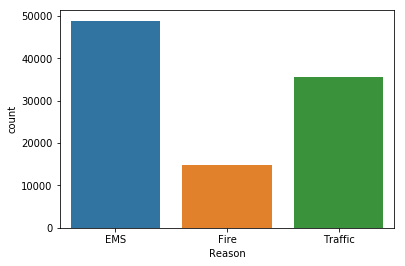

In [103]:
sns.countplot(x='Reason',data=df)

In [104]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [105]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [106]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun',}

In [107]:
df['Day of Week']=df['Day of Week'].map(dmap)

## Count Plot of  'Day of Week' by 'Reason' 

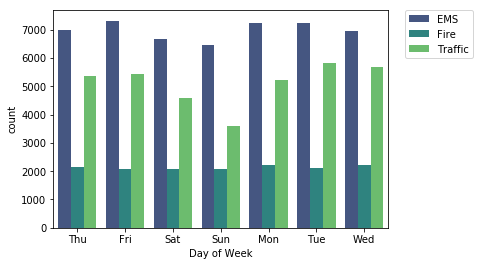

In [108]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

## Count Plot of  'Month' by 'Reason' 

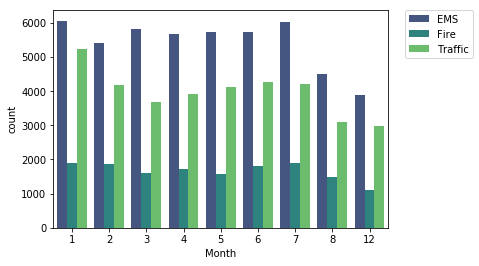

In [109]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [110]:
bymonth=df.groupby('Month').count()

** A simple plot of calls by Month to indicate the number of calls/month **

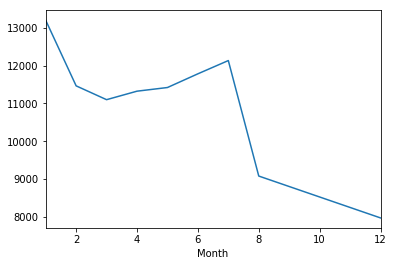

In [111]:
bymonth['lat'].plot()

## seaborn's lmplot() to create a linear fit on the number of calls per month.

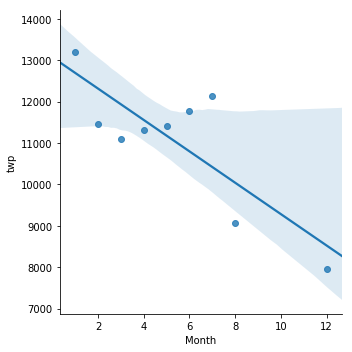

In [112]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

## Count  of calls by Month

In [113]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

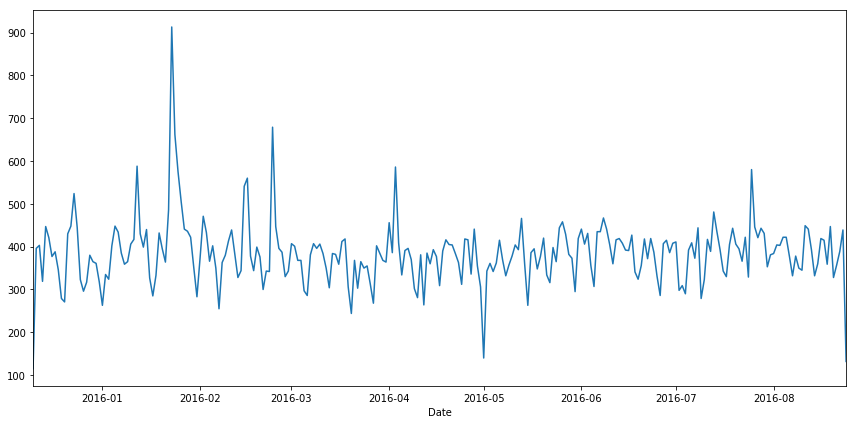

In [114]:
plt.figure(figsize=(12,6))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()


# Count  representing reason of calls by date. 

## 1.Traffic 

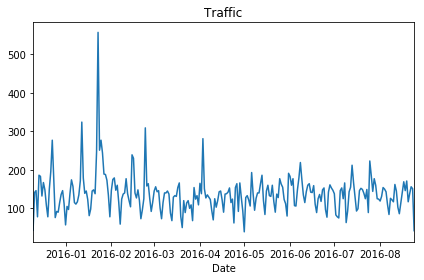

In [115]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()


## 2.Fire 

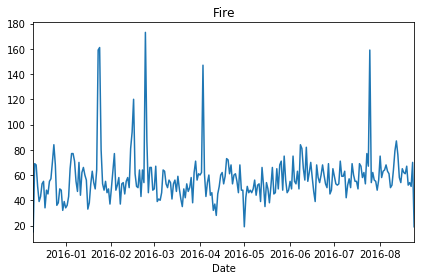

In [116]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

## 3.EMS

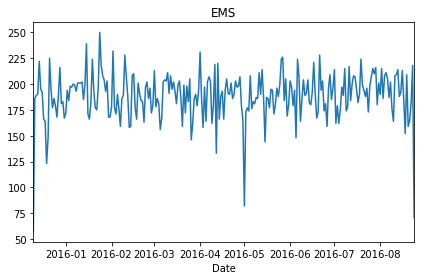

In [117]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

## A HeatMap showing calls by 'Hour'.

In [118]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

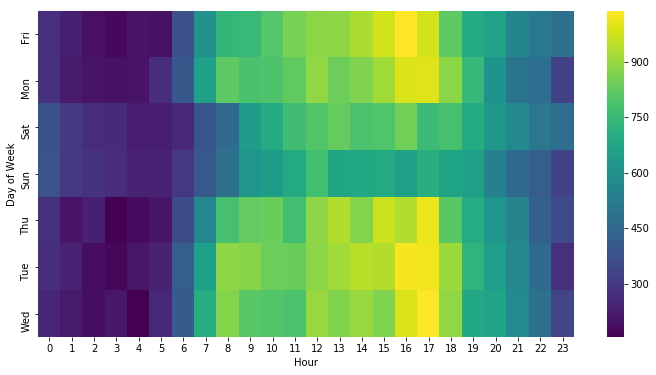

In [119]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

## A Clustermap showing calls by 'Hour'.

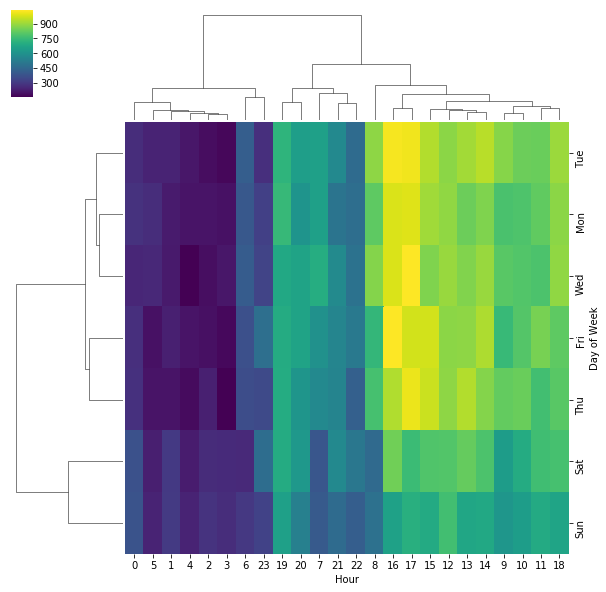

In [120]:
sns.clustermap(dayHour,cmap='viridis')

## A HeatMap showing calls by 'Month'.

In [121]:
dayMonth=df.pivot_table(index='Day of Week',columns='Month',values='Reason',aggfunc='count')

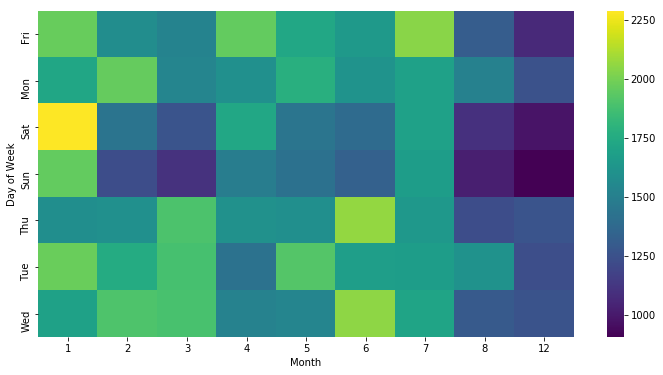

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

## A ClusterMap showing calls by 'Month'.

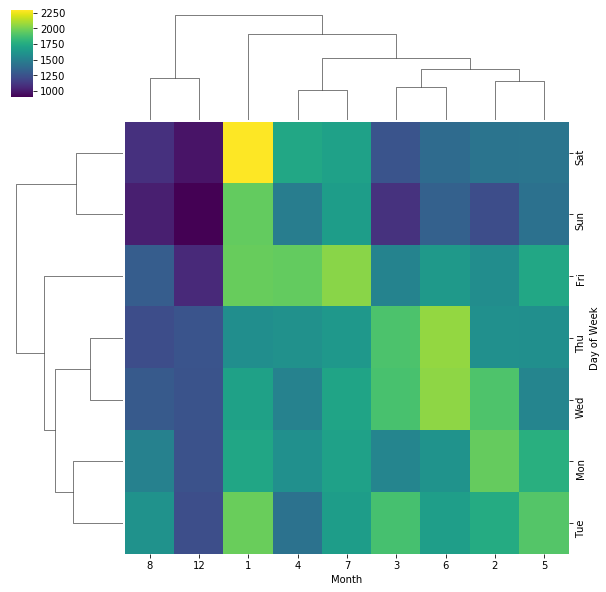

In [123]:
 sns.clustermap(dayMonth,cmap='viridis')

<div style="text-align: center"><h1>END</h1></div>
